In [385]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

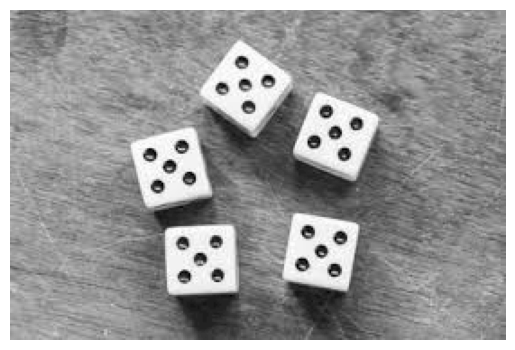

In [386]:
img_dice = cv2.imread("input/dice5.png", cv2.IMREAD_GRAYSCALE)
plt.axis("off")
plt.imshow(img_dice, cmap="gray")
plt.show()

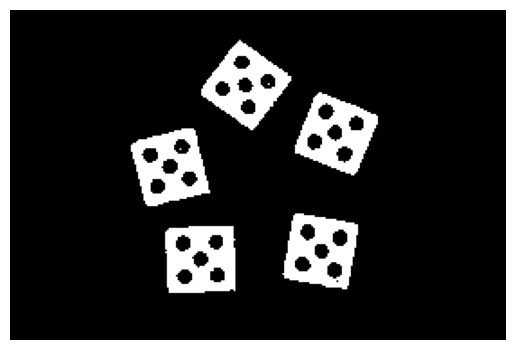

In [387]:
_, img_dice_trsh = cv2.threshold(img_dice, 210, 255, cv2.THRESH_BINARY)
plt.axis("off")
plt.imshow(img_dice_trsh, cmap="gray")
plt.show()

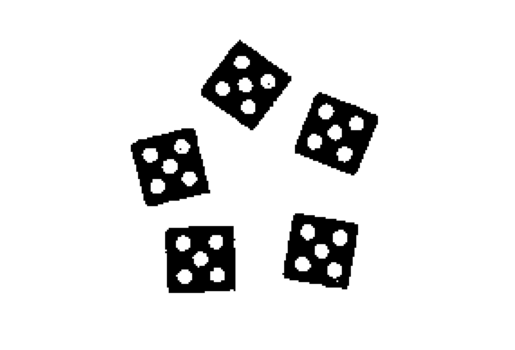

In [388]:
img_dice_trsh = 255 - img_dice_trsh
plt.axis("off")
plt.imshow(img_dice_trsh, cmap="gray")
plt.show()

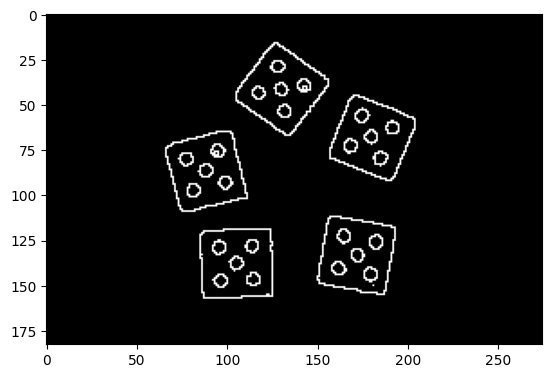

In [389]:
kernel = np.array([[-1 , -1 , -1],
                   [-1 ,  8 , -1],
                   [-1 , -1 , -1]])

img_dice_edge = cv2.filter2D(img_dice_trsh,-1,kernel)
plt.imshow(img_dice_edge, cmap='gray')
plt.show()

In [390]:
contours, _ = cv2.findContours(img_dice_edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

64

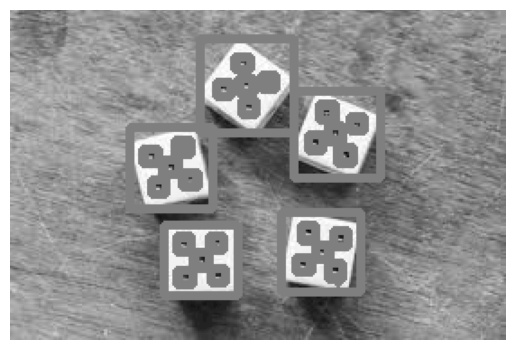

In [391]:

result = img_dice.copy()

for contour in contours:
    # if cv2.contourArea(contour) > 100:
        x, y, w, cont = cv2.boundingRect(contour)
        cv2.rectangle(result, (x, y), (x+w, y+cont), (127, 127, 127), 3)

plt.axis("off")
plt.imshow(result, cmap="gray")
plt.show()

In [392]:
contours_ex, hierarchy_ex = cv2.findContours(img_dice_edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
hierarchy_ex

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [-1,  3, -1, -1]]], dtype=int32)

[array([[[ 98, 119]],

       [[ 97, 120]],

       [[ 87, 120]],

       [[ 85, 122]],

       [[ 85, 135]],

       [[ 86, 136]],

       [[ 86, 154]],

       [[ 87, 155]],

       [[ 87, 157]],

       [[108, 157]],

       [[109, 156]],

       [[125, 156]],

       [[125, 131]],

       [[124, 130]],

       [[124, 129]],

       [[125, 128]],

       [[125, 126]],

       [[124, 125]],

       [[124, 119]]], dtype=int32), array([[[157, 112]],

       [[156, 113]],

       [[156, 115]],

       [[155, 116]],

       [[155, 121]],

       [[154, 122]],

       [[154, 126]],

       [[153, 127]],

       [[153, 133]],

       [[152, 134]],

       [[152, 137]],

       [[151, 138]],

       [[151, 144]],

       [[150, 145]],

       [[150, 147]],

       [[151, 148]],

       [[151, 149]],

       [[153, 149]],

       [[154, 150]],

       [[158, 150]],

       [[159, 151]],

       [[164, 151]],

       [[165, 152]],

       [[171, 152]],

       [[172, 153]],

       [[173, 153

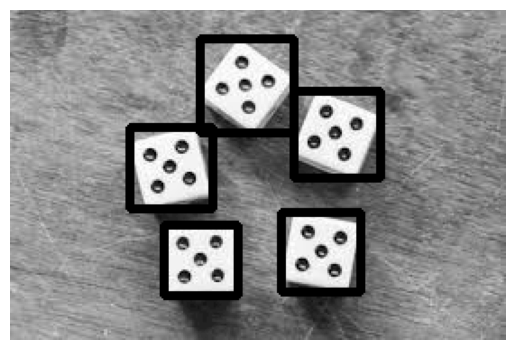

In [408]:
result = img_dice.copy()
dice_coutours = []
for contour in contours_ex:
    x, y, w, h = cv2.boundingRect(contour)

    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 100), 3)
    dice_coutours.append(contour)

print((dice_coutours))
plt.axis("off")
plt.imshow(result,cmap='gray')
plt.show()


In [395]:
contours_tr, hierarchy_tr = cv2.findContours(img_dice_edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


25


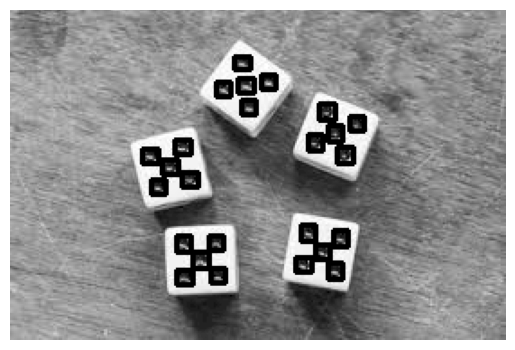

In [406]:
result = img_dice.copy()
dice_dots = 0
for contour in contours_tr:
    if cv2.contourArea(contour) > 37 and cv2.contourArea(contour) < 400:
        dice_dots += 1
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
        
# print(dice_dots)
plt.axis("off")
plt.imshow(result,cmap='gray')
plt.show()

In [ ]:
# hierarchy = np.array(hierarchy_tr[0], dtype=int)

# for cont in hierarchy:
#     if cont[3] == 1:
#         print(cont)


[ 4 -1  3  1]
[6 2 5 1]
[8 4 7 1]
[10  6  9  1]
[-1  8 11  1]
